# Predição de preços de casas na Califórnia

Produzindo um regressor para prever os preços de casas por região na Califórnia, nos Estados Unidos

# Índice

#### <a href="#parte_1">Parte 1: Exploração e análise do dataset</a>
#### <a href="#parte_2">Parte 2: Feature Engineering</a>
#### <a href="#parte_3">Parte 3: Implementação de modelos de regressão</a>

<a id='parte_1'></a>

# Parte 1: Exploração e análise do dataset

## 1.1. Importação de bibliotecas utilizadas

Antes de iniciar a exploração dos dados, é imprescindível importar as bibliotecas que serão usadas neste trabalho.

In [1]:
#bliblioteca para facilitar as operações vetoriais e matriciais 
import numpy as np

#biblioteca para facilitar a organização do dataset
import pandas as pd

#blibliotecas de visualização gráfica
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

#biblioteca de machine learning
import sklearn

## 1.2. Contato inicial com os dados fornecidos

Fazendo o upload do dataset de treino:

In [2]:
data_raw = pd.read_csv("train.csv")

Para ter um primeiro contato com a base de dados:

In [3]:
data_raw.head(10)

,Id,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,15817,-120.85,37.57,27,819,157,451,150,34934,193800
1,6236,-117.74,34.06,48,2438,599,1508,548,28983,129200
2,19262,-118.11,33.92,32,1016,190,729,177,43000,151300
3,19743,-118.12,34.15,35,1760,447,984,384,34167,198200
4,7272,-120.63,37.41,27,2083,444,1462,479,26439,69100
5,1155,-121.43,38.54,42,3321,688,1346,658,24618,101300
6,19827,-122.28,37.53,25,3710,1015,2068,958,35445,286700
7,7801,-116.99,34.88,23,6060,1165,2920,1072,31528,69000
8,9867,-117.28,34.17,26,3106,603,1396,576,31736,122200
9,10927,-122.06,37.91,15,5393,1422,2133,1288,41612,232800


Temos, assim, os seguintes dados:

Longitude e latitude: únicas variáveis *float*, representando a localização geográfica da região;

Median_Age: idade mediana das casas na região;

Total_Rooms e Total_Bedrooms: número total de cômodos e quartos na região;

Population: população total da região;

Households: número de casas na região;

Median_Income: mediana da renda na região;

Nossa *variável de interesse (target)* é a última coluna do dataset - Median_House_Value: representa a mediana dos valores de casas em cada região

É importante notar, ainda, que a coluna "ID" não será utilizada em qualquer análise, pois é apenas um identificador de cada entrada do dataset.

Assim, todas as variáveis são numéricas, o que facilita a análise por regressão.

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
Id                    14448 non-null int64
longitude             14448 non-null float64
latitude              14448 non-null float64
median_age            14448 non-null int64
total_rooms           14448 non-null int64
total_bedrooms        14448 non-null int64
population            14448 non-null int64
households            14448 non-null int64
median_income         14448 non-null int64
median_house_value    14448 non-null int64
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [5]:
data_raw.describe()

,Id,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,10277.163621,-119.563050,35.625804,28.700028,2622.627284,535.628391,1413.978405,496.934109,38747.577450,207556.603267
std,5956.576981,2.008096,2.138690,12.587508,2145.423570,416.800426,1095.060629,376.873380,19091.513037,116441.436255
min,0.000000,-124.350000,32.550000,1.000000,2.000000,2.000000,3.000000,2.000000,4999.000000,14999.000000
25%,5124.750000,-121.790000,33.930000,18.000000,1444.000000,295.000000,784.000000,279.000000,25596.500000,119300.000000
50%,10254.500000,-118.490000,34.250000,29.000000,2116.000000,432.000000,1160.000000,407.000000,35334.000000,179950.000000
75%,15413.750000,-118.000000,37.710000,37.000000,3131.250000,645.250000,1705.000000,602.000000,47500.000000,266100.000000
max,20639.000000,-114.470000,41.950000,52.000000,39320.000000,6445.000000,28566.000000,6082.000000,150001.000000,500001.000000


In [6]:
len(data_raw.dropna()) == len(data_raw)

True

Todos os valores não são nulos, não há missing data no dataset.

## 1.3. Análise inicial das features

Antes de tudo, vamos retirar a coluna "Id" do dataset a ser analisado.

In [7]:
data_no_id = data_raw.drop(["Id"], axis=1)

In [8]:
data_no_id.head()

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-120.85,37.57,27,819,157,451,150,34934,193800
1,-117.74,34.06,48,2438,599,1508,548,28983,129200
2,-118.11,33.92,32,1016,190,729,177,43000,151300
3,-118.12,34.15,35,1760,447,984,384,34167,198200
4,-120.63,37.41,27,2083,444,1462,479,26439,69100


In [9]:
labels = data_no_id.drop(["median_house_value"], axis=1)

### 1.3.1. Latitude e longitude

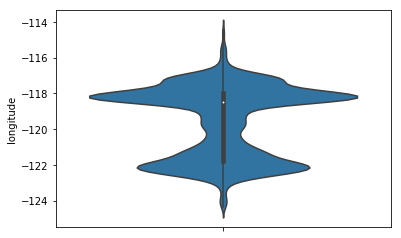

In [10]:
sns.violinplot(y=labels.longitude)

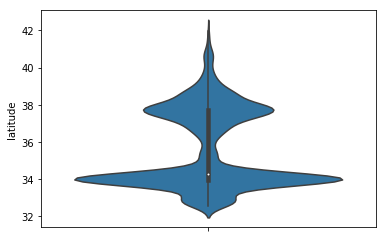

In [11]:
sns.violinplot(y=labels.latitude)

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


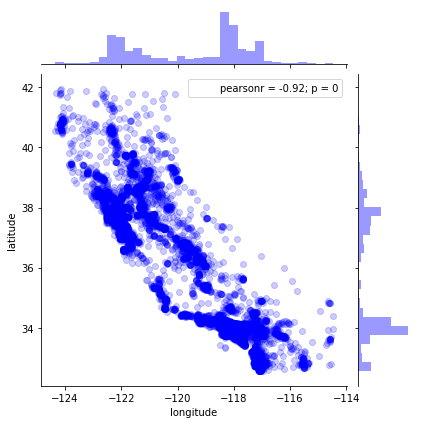

In [12]:
sns.jointplot(labels.longitude, labels.latitude, labels, kind='scatter', color=(0,0,1,0.2));

Vemos, assim, que as distribuições de coordenadas geográficas realmente representam o estado da Califórnia:

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://mala-beads.com/wp-content/uploads/2018/07/California-Lat-Long-Map-Photo-In-California-Latitude-Longitude-Map.jpg", height=600, width=540)

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


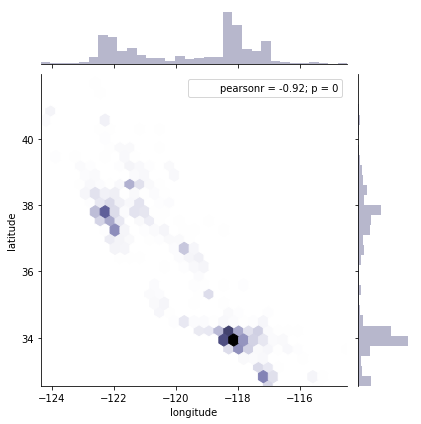

In [14]:
sns.jointplot(labels.longitude, labels.latitude, labels, kind='hex', color=(0.3,0.3,0.5,0.1));

As áreas mais representativas, assim, são regiões próximas de Los Angeles (área mais escura no gráfico) e de Sacramento (capital do estado, segunda área mais escura).

### 1.3.2. Idade mediana

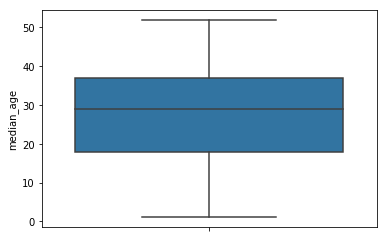

In [15]:
sns.boxplot(y=labels["median_age"])

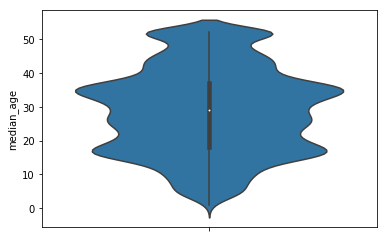

In [16]:
sns.violinplot(y=labels["median_age"])

### 1.3.3. Número de cômodos

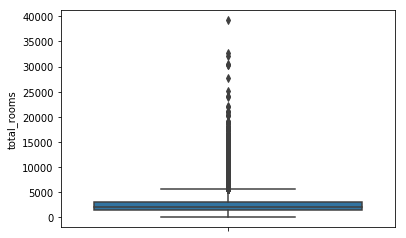

In [17]:
sns.boxplot(y=labels.total_rooms)

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


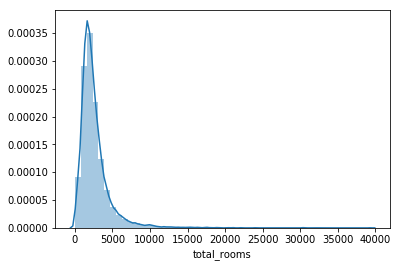

In [18]:
sns.distplot(labels.total_rooms)

### 1.3.4. Número de quartos

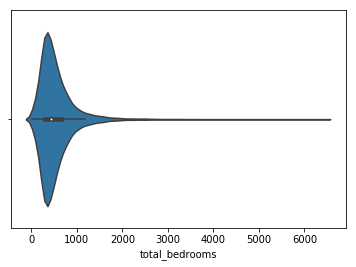

In [19]:
sns.violinplot(labels.total_bedrooms)

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


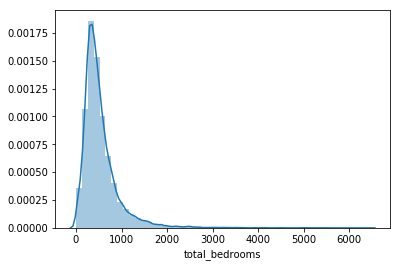

In [20]:
sns.distplot(labels.total_bedrooms)

### 1.3.5. População

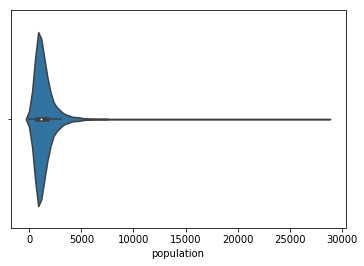

In [21]:
sns.violinplot(labels.population)

### 1.3.6. Número de casas

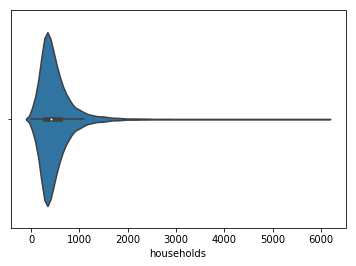

In [22]:
sns.violinplot(labels.households)

### 1.3.7. Renda mediana

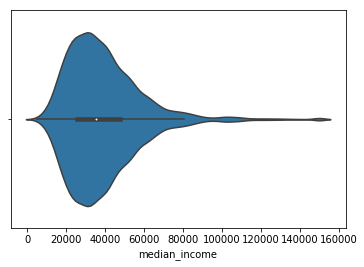

In [23]:
sns.violinplot(labels.median_income)

## 1.4. Análise inicial do target - valor mediano das casas

In [24]:
target = data_no_id["median_house_value"]

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


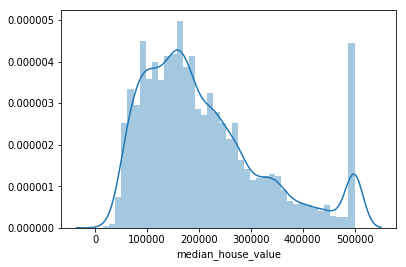

In [25]:
sns.distplot(target)

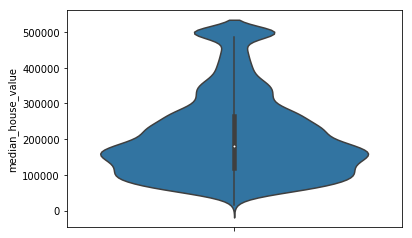

In [26]:
sns.violinplot(y=target)

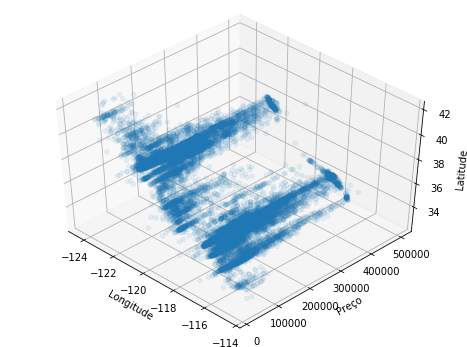

In [27]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = labels.longitude
ys = target
zs = labels.latitude
ax.scatter(xs, ys, zs, s=20, alpha=0.08)

ax.set_xlabel('Longitude')
ax.set_ylabel('Preço')
ax.set_zlabel('Latitude')

ax.view_init(45, 315)
plt.draw()

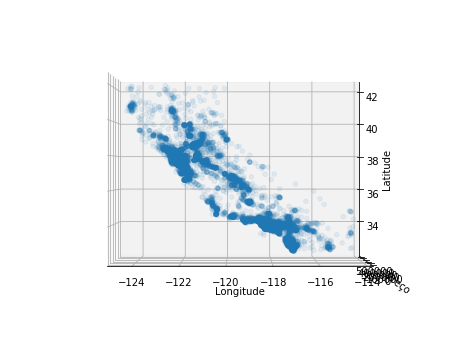

In [28]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = labels.longitude
ys = target
zs = labels.latitude
ax.scatter(xs, ys, zs, s=20, alpha=0.08)

ax.set_xlabel('Longitude')
ax.set_ylabel('Preço')
ax.set_zlabel('Latitude')

ax.view_init(0, 270)
plt.draw()

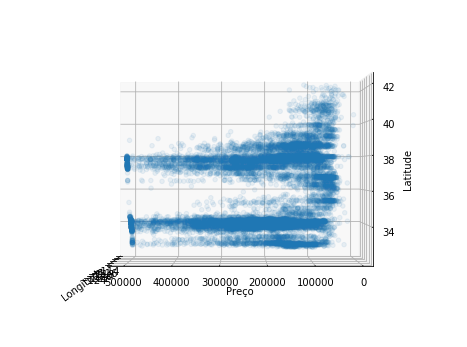

In [29]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = labels.longitude
ys = target
zs = labels.latitude
ax.scatter(xs, ys, zs, s=20, alpha=0.08)

ax.set_xlabel('Longitude')
ax.set_ylabel('Preço')
ax.set_zlabel('Latitude')

ax.view_init(0, 180)
plt.draw()

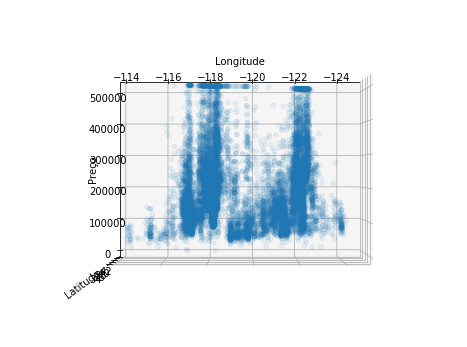

In [30]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = labels.longitude
ys = target
zs = labels.latitude
ax.scatter(xs, ys, zs, s=20, alpha=0.08)

ax.set_xlabel('Longitude')
ax.set_ylabel('Preço')
ax.set_zlabel('Latitude')

ax.view_init(270, 90)
plt.draw()

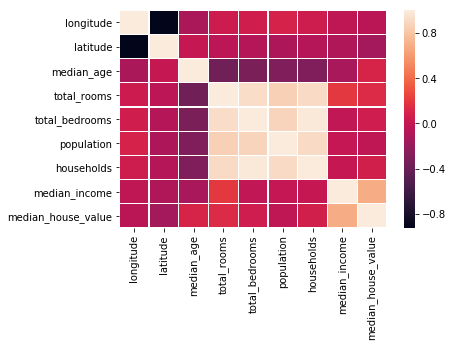

In [31]:
sns.heatmap(data_no_id.corr(), annot=False, linewidth=0.3)

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


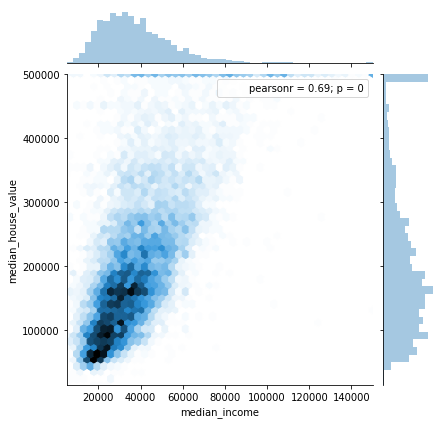

In [32]:
sns.jointplot(labels.median_income, target, kind="hex")

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


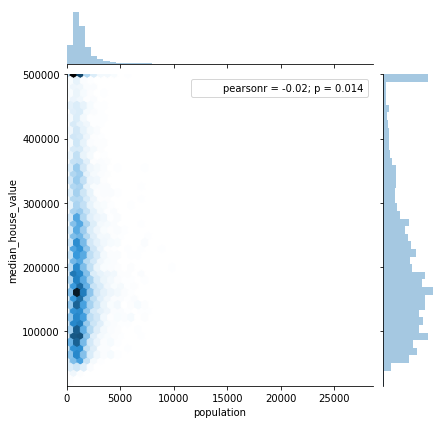

In [33]:
sns.jointplot(labels.population, target, kind="hex")

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


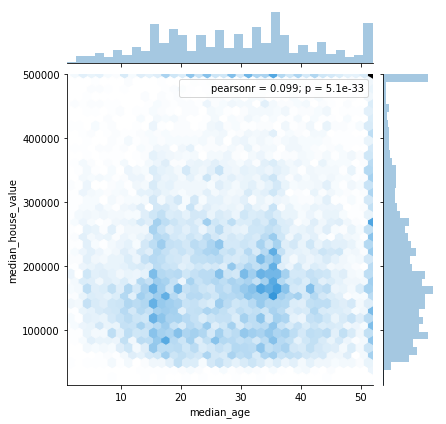

In [34]:
sns.jointplot(labels.median_age, target, kind="hex")

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


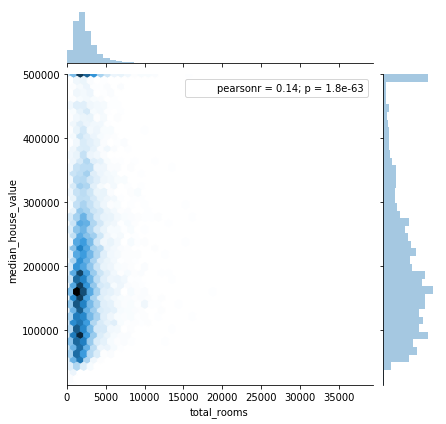

In [35]:
sns.jointplot(labels.total_rooms, target, kind="hex")

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


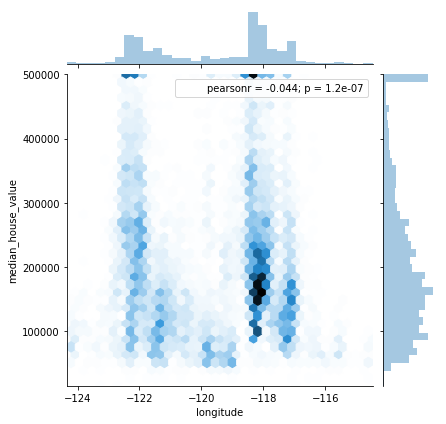

In [36]:
sns.jointplot(labels.longitude, target, kind="hex")

C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rodrigo Magaldi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


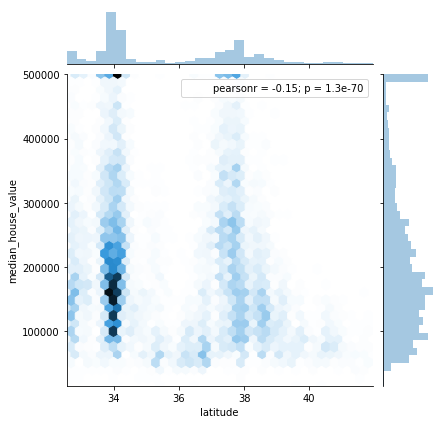

In [37]:
sns.jointplot(labels.latitude, target, kind="hex")

<a id='parte_2'></a>

# Parte 2: Feature Engineering

## 2.1. Procurando entender um pouco melhor o mercado imobiliário da Califórnia

Procurando na Internet por mais informações acerca do dataset utilizado, descobri que trata-se de dados coletados no censo do estado da Califórnia no ano de 1990. Sabendo disso, fui em busca de dados acerca do mercado de *real estate* no estado da Califórnia na época, encontrando o seguinte artigo, publicado pelo jornal americano The New York Times, em agosto de 1990:

https://www.nytimes.com/1990/08/29/business/california-sees-housing-boom-become-slump.html

Resumidamente, o artigo trata do fato de que o mercado imobiliário estava em baixa na época, após um grande período de crescimento, com preços de propriedades diminuindo rapidamente.

Não obstante, o artigo cita que "enquanto preços nas cidades interioranas como Sacramento continuam a subir, eles estão caindo nos centros populacionais espalhados pela costa do Pacífico". Assim, a posição geográfica das regiões pode ser um grande indicativo de seu preço.

Além disso, o censo pode nos indicar as áreas mais populosas do estado. Segue o link para o censo oficial do estado da Califórnia, realizado em 1990:

https://www2.census.gov/library/publications/decennial/1990/cp-2/cp-2-6-1.pdf

O arquivo tem mais de 1000 páginas, então não é possível realizar sua leitura por completo, pelo menos no tempo que resta até a entrega do trabalho. No entanto, algumas informações são achadas sem muito esforço. Por exemplo, o estado contava, à época, com um população de 29 760 021 pessoas, sendo cerca de 27 milhões em áreas urbanas, e o restante em áreas rurais. Os condados mais populosos eram Los Angeles County (cuja maior cidade é Los Angeles), San Diego County (cuja maior cidade é San Diego) e Orange County (cuja maior cidade é Anaheim).

In [38]:
print("Los Angeles County:")
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Map_of_California_highlighting_Los_Angeles_County.svg/2000px-Map_of_California_highlighting_Los_Angeles_County.svg.png", width=250, height=286)

Los Angeles County:


In [39]:
print("San Diego County:")
Image(url="https://www.familysearch.org/wiki/en/images/thumb/5/5f/California_San_Diego_Map.png/200px-California_San_Diego_Map.png")

San Diego County:


Orange County:



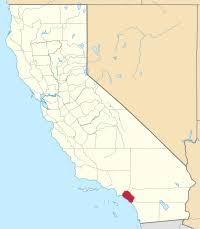

In [40]:
print("Orange County:")
Image(url="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISEhUTExIWFRUVGBgYFhgYGRkVGhYXFxUXGBgVHRUYHSggGBolGxUXIjEiJSkrLi8uFyAzODMtNygtLisBCgoKDg0OGRAQGyslHyYtNS0vLS0tLS0tLS0tLzUtLS0tLy0tLS0tLS8vLS0tNS8tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOUAyAMBIgACEQEDEQH/xAAbAAEAAwEBAQEAAAAAAAAAAAAAAQIDBAUGB//EAEUQAAEDAgMEBgYIBAQGAwAAAAEAAhEDIRIxQQRRYXEiUoGRodEFEzKxwfAzQnKSssLS4RRigtODk6LxBgcjNLPyFVNz/8QAGQEBAAMBAQAAAAAAAAAAAAAAAAECAwQF/8QAIhEBAQACAQQCAwEAAAAAAAAAAAECEQMSITFBBCJRYXEy/9oADAMBAAIRAxEAPwD9WqNkZxl4GVWlTruEhlOLxNRwNjEx6taLp9GOAGC3RyGsG89+LuV/k8cs3pz/AB87LpxmjtExgpT/APo7v+iU/wAPtHUpf5rv7S9LFBdGciOeEX5eRVhRbu7dT2ri6MXX15PL/h9o6lL/ADXf2lQUtoOVOnz9a6P/ABr2PVN6o7grp0Y/g68nit2PaOpSP+K/PfHqrKfUbRMYKX+a7+0vZVD7Q5HwI8ynRDqrxqYrunCykY3VXf202intDR7FLOLVHfGlwXtMpgTAibniq7QwFpBvlbKTNhbirTHCZTt2Rcsul4dZ1dlP1jqdOAATFR03IGXq+O9XxVOoz75/Quj0/TPqnmeiGi3HENN2XcoWXLJNaacdt8sMdTqN++f0JiqdRn3z+hbosttdMMVTqM++f0IXVeoz75/Qt0TZpgHVOoz75/QqVRVOHossZ9s7iOpxXUibNMMVTqM++f0Kk1R9VpG7GT+RdSJtGmAfUP1WffP6ExVOoz75/QtMJm2SumxhiqdRn3z+hMVTqM++f0LdE2nTmdXeC0Fg6Rj2uBPV4Ir1/ap/aP4HIr4q1stdkpYsZ+zGlxJ+I71kun0Y4EOAIMO7rD4gr1ue/R5XDPus4agm0SDFgHTHPNdayrn6oBkg7vnVT6rcY4ady4HaGpPs346Dz5KGV2kAki43qbtaBmbDd4IHBsNm5MczBPwJQT65vWHeFU1W4hcZHXiFOIkmIsY8AVWsHRmMx29IaaBSbR60EnpgAWsRfLXyUhzM5bO8kE960pg66meSshp5vp2oDs9SCMhrxCzW/p7/ALep9n4hYLDl9NuP2IiLJoIiq53agsip0uHL91LXaHP3po2siIgIoc6FW53gdk/smjawdopUARkpQY1/ap/aP4HIor+1T+0fwOUrTHwrWpByGZsPnx7F3bBQbTbgGme8k3xE6zdcQdBB3EHsyPgSvShrgCOwhej8m3tPTzuCTvfaX5t5/lKusS44mg7yQdDY92attM4TGfw18JXK6QmXDWAZ4G0dsSsP4RhcS6cWc4iLaRB4BaCi7rxyaI7JyPOdVTaaBj23GCNwjpDUAHLirS2eEZSXy6WtAEBVq5do/EFX+GbqJ+0S6OWKYWD6LWvaAB0pkRIhsnFwMuaO1VS7FjsuLDL8yZjKBuSMJs2xjLffPzSpUc0SQDyt79OKn9F/Lm9Pf9vV+yVgo9JbQX7PWkRDTHlzt45I5wHzKy5sbuRpxZTVqUVG1JJG6L81dY2a8tZds65MCN4B5EwrNbGs/PBQ65A7e791Dn9IAdvwUybmkW6u2izrAR7ozlaKh9ocj7x5KImowujO/DJTJOkcbK6Js0q1nad6siKEiIiDCt7bOZ/CVKit7bP6vwqVpj4VrZTSqYDMw0+1+r50UIV7WWMymq8bG2Xcd9akSJDjIuMs44BaCSMxfgfNU2Myxs7h28e3NSH4bHfbjJyXm2enoS+1aO0NwjpNyGo3Kxrs6ze8KtB5nDEZx35RpYhbqEuWjXLmNLQTIFzEcTEz2KzaIaWnvdFy7Qnvdwumz2c8b3SMo9ls+JntVKtR0kRLHWm3RMQRGZ07Sp1tG9Ok1ALa8L+5PWDfHO3vWFNn1SOiLwc7zmddfBW6GZJ4Ek9wcie7g9NPHqqobEFmm+Y9xCq9u7MfMK/p4N9Q8zeOsTm4WzWePgVnnbLLGmElllU2cZ9luVlsqNBmT5q6xyu7tpjNTSobeVZZMow4uk3GRvG/NaqKmCp9bmPd/urqjfaPIfH9lEKuiIiRERAREQYP+kZ9l57ZYPiVKh/0jfsv/FTUrTHwrWyIi9x4ru2B0saOqMJ5i3jn2q+0NkREmbc8+5cuw1Q2WkwSZG42Ajnb506nukQAd4MRHG9l53Jj05V38d3jEOo3kDSIBLe2ys1oI1g7yfNTTeTYiD7+IWTCcRAgCbSJ0BIzWa6KTIe4C2R7CT3ZR2BRQnBJMkYraSCQcu1NoDgWvMENmYEHDBnW4yMcFGzNDvrS04jbLpOdqNylHtq8Nbc3O/X9ggLjv8APiVmBicQ02bAJuTMTFzaOiePYtsByxW8eUol5X/EJIpEEkzhgWj2xMkDl3qzTIldXpL0e2qwgkt/mzI1tPEA9i86nUc0inUGF0dE/VeBqNx3tzHEXVOaS4zS/FbLdt3OhGuBVHmbDePfPuSoYg9h5H59655G1rRFWpOnz3pTJgTnqnT22b76WJVKZtzk/FKnhryUlkkHd8/FJr2XfpZERQkREQEREGD/pG/Zf72KUf9I37L/exFpj4VrZERe48VDhK7dl2qei72t+jvI8FxqlUWsYIuDuIv3LPk45nF8M7hXrVmSOIvu7J0VXxhkaXCx2Gu57A6OYJyMaH6wOYPFZDbWExOEEggnocXASRu964Omu7qnZ2OqGJw2G838JXPRpXe20A6iTcA563Jz/AN8//laGA9MQAejPSgWymVfYXl2ItIgu1kkGAL3tyS42eYiZY3xWtOngJDW59LQX1J8NFd1UjMX4Gf38FDgQRfO2XbYdhVzDQSTzPJVWYufdpdYT2Cx33z4KNtpsqMLXQRIOcGxsQRcHcRqtKVKek4dI774RoPPilelboi4mNMxHzyUjxm4qUMqXBMNqZAmYwu3OnXJ3A2W9RkiF6eFj2lpaC0iC0jQ6EFeRtFJ1DMl1LRxuafBx1b/NprvWWWNl6sWuOUs6cmyIiwaiIiAiIgIiICIiDB/0jfsv97FKh/0jPsu97VK0x8K1siIvceKKHtBBByNipRBNF7mezEat8jp+y5PRtaH4XtBx5SAeIbIMNkXgxcROQHUoOzk08TPaAAg5FzYaCDocvDLNY8kxnn20w6re3p31GU3+0wOi0FocR2KrWAYnRBBuf5Zm8Z2JW1Oo4i7CDqJafGVQSXEEQDfSSIgi3LPiuHbt1EVarCQ2ZM3Avod2RUQXOGLIXb/MeI4ZxvvaFdkMhsW+qBu3dkqz2Fwg2B0179OzvRJ60aAniMu/XsQvJyHaQQB35qaOUbrfPv7VD36DP3b75THwUJZ+th14ByN7RBIvv4cVtjGXzyVKlQNtru95PDiqPYYa0k5iCIBkXgzyUoedtOxOonFTBdS1YLmnxYNW/wAmmm5TTeHAFpBBuCLghekysci0z2CfFebtuyOY41KTCQTNSna+97b2dvGvO5yz49940wz/ACsipRqhwDmmQfnsPBXWDYREQEREBERBhU+kZyd+VSoqfSM5O/KpWmPhWtkRF7jxRERAWmzOuWZBxkHjAsNxtKzUESqZ4dU0thl03b1A+M+/T9lFQGZEWBzMbuHBedSccQGIw6QZOLQnWd3iV20qY9kkkjUnMdnuXByYXC6d2GfXNrtZiAJzOXCU9bEA5nKNY9ySWiIkCwPn5qKlGRn0pBnkcuAzHaVVZOF0yLTnr4Rmor1hTA1Js1urj83Kqys9wswDfidkeTZ8YV6dIglziCcrCIG7M6/NkEUWukucACQBEzAEm539IpUpaD/1MWI3XVgSbgwNOPHkq+sPPscPG8ogq1LEwQW37Be0citlz+tlwGEjMXGdsvDwWtI25W7v2RLz9u2EgmpSHSPtsyFTiNA/jkcjoRhQrB4kcjoQRmCDcEbivaXnekNgJPrKUB/1m5CoBodztzuw2yzzw20xz0yRZ0K4eJEggwQbFpGbSNCtFzthERAREQYVPpGcnflUqm0Uw57AQD7RuJ0RaY+Fa6URF7jxRERAREQbej2DE6RJgdxkR/p8V1VGEZXEgjUiOZuF54JBkGD82I1C9HZq4eJ11G4+S4ufCy9Xp18OUs6fa1N8j3/O5GWJGgAI4TNvBUdTE3Eg67iSfPxUUmBhI3mZ4n4rnbr1BEuHaN8fFUfXJHRYSeIwgd+fZK0qGeiNfAKap6J5H3KRnRpCBrYZgZcotmtgEAiyKBlWEkRnBI5gthWp3uO0cQh9rkPfp4JTzI4z2H95Ui6IihLg9IbBiPrKcCoBF8ngfVd8DmOIkHkoVg4GxBBhzTm07iPkEEEWK9pcPpDYcZxsgVAIk5PHUdw3HME8waZ4dS2OWnOiyoVsU2Ic0w5pzadx88iLharnvZuLLaXENMZ6K9RxAkCeC4PXVnta8MaQYcBJneJMeC048d2W+GeeWpZPLqqe2zk74IuZtV1R4LQQGC+IFsucbtuNA09pCK0xsLlHoIiL2njiIiAiIgKadUsMjIwHTunOdIkqEUZYzKaqZbLuPRkuFoIOod7jChrnXBAMGM89d3FcVCsWGMwSLbiSBI8l3k4STofAx7rLz8+O4XTuwzmU2pSBEgAaEXOumXBWfiIIgX4nyVntmCIkeI3eKljp7LFZtES7cO8+SS7cO8+SuqS46R4nuyRCgLsRsMhNzx4fMKYdMwMozPktGtAUoM2vcSRAsYzO4HdxUy7cO8+SMzdz/KFdEqy7cO/9lEu3DvPkrog8/b9hc8h7cLajRAMkhw6jhGU65jMag8lCvikEFrmmHNObTu4jcciF7a4vSOwY4ewhtRosdHDqO3t8RmNQaZ4dS2OWnMub0cOhG5zxyAe4AchEK+z18Uggte2zmnNp+IOh1VNksXt1DieYdcH3j+lYa1uNnSiIrYooiIvdeKIiICIiAiIgghdex7QTIcZiLxw1gePFcq6fR2b/AOnvv4wB4LDnk6NtuG/bToY+btFu6ezzUOg/yu0mBPDiOS2AhCJzXC7UMdIB3hSsaVPcSLnLLPdlopIMxiMaWHl8wg1RUDD1j4eSYD1j4eSAzN3P8oV1SkM7zf4BXQEREBERBxekNg9ZDmnDUb7Lt46rhq0/uF5WxlxfUL24CMLC3O7RimdQfWW4RyX0S8rb6WB+P6tQgO4PiA7kQGt5gbyqZzcWwuqhERZYtaIiL3XiiIiAiIgIiICNJBltj7+B3oofMWueNvFRZvtU701G0P63eBHgJV/41/Vb3nysuI1iBcRESJBJncBcp6x3Vk8JEdpERyJWd4sL6XnJnPb1NkrhwjI3JHM+IvmtqotxF/2+HavJpPdZw6JG/Xs3Lc7UTZzZ5GB269l1z58Fl+rfDnln2eiCiw2baMUiII0ztvlZ+kPSdGgAa1VtPFMYiBMZxOeYWFll1W+P3/z3dDM3c/yhXWFGrIBbDgelINr3EESDb4LTGeqfDzUJXRUl24d58lMu3Dv/AGQWUOIAk2AUS7cO/wDZQcW4eJ8ICIWa4ESDI3i6y2zZxUY5hMSLHcRcHmCAUo7PgnDABMxGVgLXsLLm9JbS9uFrSMTyfqzhaB0nZxqBzcEuoTbkY5wcWPjE2CYyIMwRqMjY5cc0U0qQbNySTJJuSd5KhYTXpv39tERF7jxhERAREQEREBERARFDnQJKCUUNcCJCgNy4CPd5ILNe5plsTBF+JF7cl+ff8x/Rm0vq+vu+mGgQ0H/pxn0ZNjnK+8a0g5kgnWLDnnnzWpCy5OLHPy6/h/Mz+NyTPHv+nwP/ACz/AOI6jajdkLS9jiS2M6dpJ+zZfqi+X9Degdn2eu6qxpBqDDmYbJkwNxIHKOK+lwHrHw+IXDlx3C6rv+T8ji58+vjmvz/V0VMB6x/0+SrWYcJ6RyO7dyVXO1ReVSL6RLZJGcWHaLWmDbf3n0mXAIcYNxl5K+eFx/iuOcy/q68v0kf+rT+xU8XU/JejgPWPh5LxqBLnPe4y7E5vANY4tAHcTzKyzusWuE3WyIixxa0REXuvFEREBERAREQEREBERAREQZ0qkyCIIJ/393etFXAJmL71ZBBEr0djfLATnkeJBifBeemy7cKZLajmNbmwkwTLjIg55jLesPkY7x224MtZaesqVvZPJch9L0d7jyZUcO8NWdX0q0iG06jv6cP4yFxarsdtfZ2viRl8weHBarzD6VdpRf8A1OYPwuKqfSNb/wCpg/xHHw9X8VOsqdnqrxqtB1Jwlwc173xaCC7FUuZgizt2iy2z0ltDGlw9VNgBhcZLiGi+MWkjRWe2o8tdUeDhBjC3Dd0Sbk6CBlYnes+SSTVXw3vs2RUwnrdw85RZYtauiIvbePoREQ0IiIaERENCIiGhERDQiIhoREQ0LJzbtvvHYRP5QpRVy8VbD/UXwphRFyu0wphREGVSg1xIcA4QLESM9x5BZHZXNux5H8rum3xMjsMcERRljL5JbPC+wbR6xjXxEzbPIkfBERcepLXRt//Z")

Assim sendo, as regiões mais populosas eram, ainda que da queda no mercado na região, na área litorânea ao Sul do estado.

Além disso, o condado de Sacramento, ainda que seja apenas o sétimo mais populoso (à época), é importante por conter a cidade de Sacramento, capital do estado da Califórnia.

In [41]:
print("Sacramento County:")
Image(url="https://upload.wikimedia.org/wikipedia/commons/thumb/1/13/Map_of_California_highlighting_Sacramento_County.svg/1920px-Map_of_California_highlighting_Sacramento_County.svg.png", width=300, height=300)

Sacramento County:


## 2.2. Estendendo o conhecimento adquirido para o dataset

Conhecendo essas cidades, encontram-se na Internet suas coordenadas:

*Coordenadas de **Sacramento**:*



Latitude  --> 38.575764

Longitude --> -121.478851



*Coordenadas de **Los Angeles**:*


Latitude  --> 34.053889 

Longitude --> -118.245



*Coordenadas de **San Diego**:*


Latitude  --> 32.715736 

Longitude --> -117.161087



*Coordenadas de **Anaheim**:*


Latitude  --> 33.835293 

Longitude --> -117.914505

In [42]:
SACRA_LAT = 38.575764
SACRA_LONG = -121.478851

LA_LAT = 34.053889
LA_LONG = -118.245

SD_LAT = 32.715736
SD_LONG = -117.161087

ANA_LAT = 33.835293
ANA_LONG = -117.914505

Assim, podemos definir uma "distância" de cada região até essas cidades. Nota-se que esse valor não é uma medida de distância de fato, é apenas a raíz quadrada da soma dos quadrados da diferença de latitude e longitude:

In [43]:
labels["dist_to_la"] = ((labels.latitude - LA_LAT)**2 + (labels.longitude - LA_LONG)**2)**0.5

In [44]:
labels["dist_to_sacramento"] = ((labels.latitude - SACRA_LAT)**2 + (labels.longitude - SACRA_LONG)**2)**0.5

In [45]:
labels["dist_to_sd"] = ((labels.latitude - SD_LAT)**2 + (labels.longitude - SD_LONG)**2)**0.5

In [46]:
labels["dist_to_ana"] = ((labels.latitude - ANA_LAT)**2 + (labels.longitude - ANA_LONG)**2)**0.5

In [47]:
labels.sample(3)

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,dist_to_la,dist_to_sacramento,dist_to_sd,dist_to_ana
5467,-119.08,37.78,17,1631,335,285,128,27656,3.818524,2.527395,5.415625,4.113282
546,-117.76,33.72,15,941,266,366,248,43636,0.588818,6.116232,1.169292,0.192780
7671,-121.28,38.13,48,1892,333,804,352,40625,5.081920,0.488106,6.802918,5.456287


Para ver o heatmap da correlação dos preços com essas variáveis, é preciso adicionar as colunas ao dataframa que contém o nosso target (a precificação).

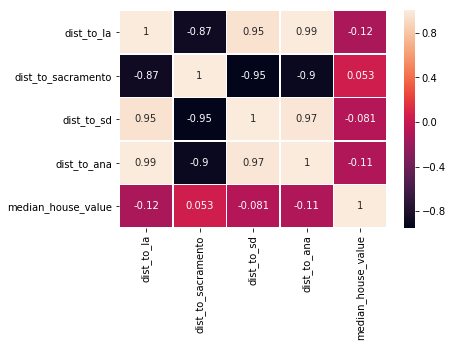

In [48]:
data_no_id["dist_to_la"] = ((data_no_id.latitude - LA_LAT)**2 + (data_no_id.longitude - LA_LONG)**2)**0.5
data_no_id["dist_to_sacramento"] = ((data_no_id.latitude - SACRA_LAT)**2 + (data_no_id.longitude - SACRA_LONG)**2)**0.5
data_no_id["dist_to_sd"] = ((data_no_id.latitude - SD_LAT)**2 + (data_no_id.longitude - SD_LONG)**2)**0.5
data_no_id["dist_to_ana"] = ((data_no_id.latitude - ANA_LAT)**2 + (data_no_id.longitude - ANA_LONG)**2)**0.5

sns.heatmap(data_no_id[["dist_to_la", "dist_to_sacramento", "dist_to_sd", "dist_to_ana", "median_house_value"]].corr(), annot=True, linewidths=.5)

<a id='parte_3'></a>

# Parte 3: Implementação de modelos de regressão

Antes de tudo, é necessário importar o dataset de teste, aplicar a ele as mesmas colunas adicionadas ao de treino e importar as bibliotecas que serão utilizadas para realizar as regressões.

In [49]:
teste_raw = pd.read_csv("test.csv")

In [50]:
teste_raw["dist_to_la"] = ((teste_raw.latitude - LA_LAT)**2 + (teste_raw.longitude - LA_LONG)**2)**0.5
teste_raw["dist_to_sacramento"] = ((teste_raw.latitude - SACRA_LAT)**2 + (teste_raw.longitude - SACRA_LONG)**2)**0.5
teste_raw["dist_to_sd"] = ((teste_raw.latitude - SD_LAT)**2 + (teste_raw.longitude - SD_LONG)**2)**0.5
teste_raw["dist_to_ana"] = ((teste_raw.latitude - ANA_LAT)**2 + (teste_raw.longitude - ANA_LONG)**2)**0.5

In [51]:
teste_raw.sample(3)

,Id,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,dist_to_la,dist_to_sacramento,dist_to_sd,dist_to_ana
1498,13752,-118.19,34.87,2,2103,389,923,338,50553,0.817962,4.954718,2.387366,1.070755
4247,7084,-118.18,33.85,30,2548,717,2086,700,7007,0.213999,5.763268,1.524709,0.265902
4212,3333,-119.31,34.38,23,282,69,130,57,24375,1.113810,4.723172,2.718014,1.498036


In [52]:
teste = teste_raw.drop(["Id"], axis=1)

In [53]:
teste.sample(3)

,longitude,latitude,median_age,total_rooms,total_bedrooms,population,households,median_income,dist_to_la,dist_to_sacramento,dist_to_sd,dist_to_ana
2006,-122.08,37.38,36,1199,198,485,199,50796,5.076440,1.338369,6.778721,5.469579
638,-122.43,37.72,52,2206,478,1583,456,37105,5.563685,1.279459,7.266643,5.956563
5489,-117.75,34.05,46,1480,358,1511,348,19718,0.495015,5.864032,1.458451,0.270483


In [54]:
# árvore de decisão
from sklearn.tree import DecisionTreeRegressor

# regressor com KNN
from sklearn.neighbors import KNeighborsRegressor

# regressor linear Ridge
from sklearn.linear_model import Ridge, RidgeCV

# regressor linear Lasso
from sklearn.linear_model import Lasso, LassoCV


# Biblioteca de validação cruzada
from sklearn.model_selection import cross_val_score

Vamos começar!

## 3.1. Regressão com Ridge

Primeiro, usaremos o RidgeCV para fazer a validação cruzada com esse modelo.

In [55]:
rcv = RidgeCV().fit(labels, target)
rcv.score(labels, target)

0.6456119140733324

Feito isso, podemos realizar a predição de fato, com a base de teste

In [56]:
ridge = Ridge()
ridge.fit(labels, target)
pred_ridge = ridge.predict(teste)

Para guardar os resultados num arquivo .csv para submissão no kaggle:

In [57]:
resp_ridge = pd.DataFrame(list(zip(teste_raw.Id, pred_ridge)), columns= ['Id','median_house_value'])
resp_ridge = np.abs(resp_ridge.set_index("Id"))

resp_ridge.to_csv("resp_ridge.csv")

## 3.2. Regressão com Lasso

Primeiro, usaremos o LassoCV para fazer a validação cruzada com esse modelo.

In [58]:
lcv = LassoCV().fit(labels, target)
lcv.score(labels, target)

0.5123530136649221

Feito isso, podemos realizar a predição de fato, com a base de teste

In [59]:
lasso = Lasso(max_iter = 10000)
lasso.fit(labels, target)
pred_lasso = lasso.predict(teste)

Para guardar os resultados num arquivo .csv para submissão no kaggle:

In [60]:
resp_lasso = pd.DataFrame(list(zip(teste_raw.Id, pred_lasso)), columns= ['Id','median_house_value'])
resp_lasso = np.abs(resp_lasso.set_index("Id"))

In [61]:
resp_lasso.to_csv("resp_lasso.csv")

## 3.3. Regressão com k Nearest Neighbors

Primeiro, será preciso escolher k, realizando validação cruzada:

In [62]:
lista = []
for i in range(1,51):
    knnr = KNeighborsRegressor (n_neighbors=i)
    scores = cross_val_score(estimator=knnr, X=labels, y=target, cv=10)
    lista.append((i,scores.mean()))
print(lista)

[(1, 0.21682368305663183), (2, 0.3928898720264121), (3, 0.45406592284752334), (4, 0.47844784827351194), (5, 0.4965955392978583), (6, 0.5034968183201886), (7, 0.5070829971237014), (8, 0.5088553849469729), (9, 0.5118894348292697), (10, 0.5130275129829978), (11, 0.5144730696829838), (12, 0.5147573734896003), (13, 0.5154493356547319), (14, 0.5156654452009539), (15, 0.5155026580246521), (16, 0.5153058203808198), (17, 0.5149473870399371), (18, 0.514380576476489), (19, 0.5137030363565827), (20, 0.5137787706012928), (21, 0.5133791773655662), (22, 0.512907973719967), (23, 0.5127903575705494), (24, 0.5123566612245855), (25, 0.5119370709961313), (26, 0.5118241260867478), (27, 0.5119903717513796), (28, 0.5120789862982563), (29, 0.512275018364497), (30, 0.5121379690560228), (31, 0.5115901832901809), (32, 0.511290712323507), (33, 0.5107706500538814), (34, 0.5104733071738505), (35, 0.510276410096832), (36, 0.5102530587743959), (37, 0.5101735307498828), (38, 0.5104678728866147), (39, 0.510204588717607

In [63]:
best_n = 14

Definida a quantidade ótima de vizinhos, pode-se aplicar o modelo à base de teste e salvar a predição num arquivo .csv, para submissão no Kaggle.

In [64]:
best_knnr = KNeighborsRegressor(n_neighbors=best_n)
best_knnr.fit(labels, target)
pred_knn = best_knnr.predict(teste)

resp_knnr = pd.DataFrame(list(zip(teste_raw.Id, pred_knn)), columns= ['Id','median_house_value'])
resp_knnr = np.abs(resp_knnr.set_index("Id"))

resp_knnr.to_csv("resp_knnr.csv")

## 3.4. Regressão com árvore de decisão

Primeiro, iremos definir a altura máxima da árvore, nos utilizando de validação cruzada:

In [65]:
depth = []
for i in range(3,20):
    tcv = DecisionTreeRegressor(max_depth=i) 
    scores = cross_val_score(estimator=tcv, X=labels, y=target, cv=10)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.49101148642883885), (4, 0.540916659226854), (5, 0.5887025662410061), (6, 0.6351576181581481), (7, 0.6763702801782232), (8, 0.7004802541785553), (9, 0.7092076210309182), (10, 0.7047338216843004), (11, 0.7006640356830044), (12, 0.694606311278041), (13, 0.6815568350834034), (14, 0.6761365015645511), (15, 0.6698299249545048), (16, 0.6616373515380527), (17, 0.658323361296909), (18, 0.6480852653566085), (19, 0.650670619344012)]


In [66]:
best_d = 9

Definido isso, pode-se aplicar o modelo à base de teste e salvar a predição num arquivo .csv, para submissão no Kaggle.

In [67]:
best_tree = DecisionTreeRegressor(max_depth=best_d)
best_tree.fit(labels, target)
pred_tree = best_tree.predict(teste)

In [68]:
resp_tree = pd.DataFrame(list(zip(teste_raw.Id, pred_tree)), columns= ['Id','median_house_value'])
resp_tree = np.abs(resp_tree.set_index("Id"))

resp_tree.to_csv("resp_tree.csv")

## 3.5. Análise dos resultados

O modelo que obteve melhor resultado foi o baseado na regressão por árvore de decisão. Isso está de acordo com os resultados obtidos neste notebook, pois foi a árvore o modelo que obteve melhor resultado também nas validações cruzadas realizadas!